# Load dataset

In [1]:
import tools

In [2]:
edges, nodes, poss_set, neg_set = tools.sample_structural(
    '../datasets/undirected/PowerGrid/train.in', 
    N=10, 
    sparse=True)

Iteration 0, sampled edges 481
Iteration 1, sampled edges 601
Iteration 2, sampled edges 637
Iteration 3, sampled edges 650
Iteration 4, sampled edges 654
Iteration 5, sampled edges 656
Iteration 6, sampled edges 658
Iteration 7, sampled edges 658
Iteration 8, sampled edges 658
Iteration 9, sampled edges 658
Iteration 10, sampled edges 659


In [3]:
len(edges), len(poss_set), len(neg_set)

(6594, 659, 659)

# Visualize network

In [8]:
from graph_tool.all import *
g = Graph(directed=False)
g.add_vertex(max(nodes) + 1)

<generator object <genexpr> at 0x7f1ec00a1dc0>

In [9]:
for edge in edges:
    if edge not in poss_set:
        u, w = map(int, edge.split())
        g.add_edge(g.vertex(u), g.vertex(w))

In [10]:
pos = sfdp_layout(g)

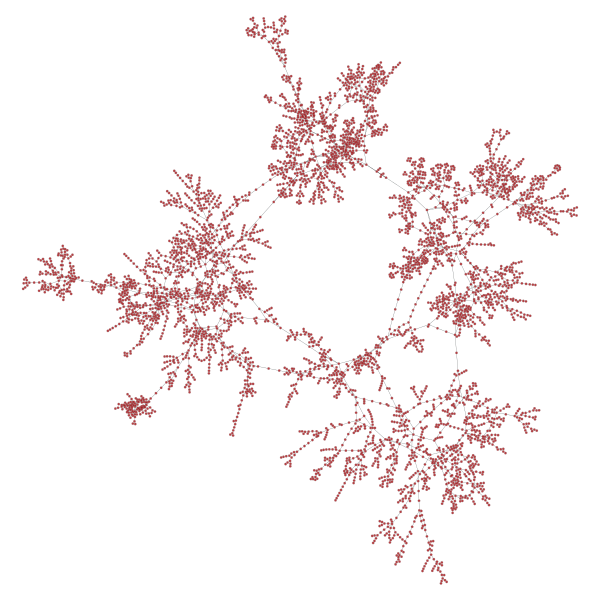

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f1ec1b0ad10, at 0x7f1ec28d6110>

In [11]:
%matplotlib inline

graph_draw(g)

## Similarity indices

In [12]:
from sklearn.metrics import roc_auc_score

In [13]:
features = tools.TopologicalFeatures(g)
X, Y = tools.make_dataset(poss_set, neg_set, 
                    [features.preferential_attachment])
roc_auc_score(Y, X)

0.58406193225123826

In [14]:
features = tools.TopologicalFeatures(g)
X, Y = tools.make_dataset(poss_set, neg_set, 
                    [features.Adamic_Adar_coefficient])
roc_auc_score(Y, X)

0.62140296259794925

In [15]:
features = tools.TopologicalFeatures(g)
X, Y = tools.make_dataset(poss_set, neg_set, 
                    [features.common_neighbors])
roc_auc_score(Y, X)

0.6214363511182851

## NMF

In [17]:
from sklearn.decomposition import NMF
model = NMF(n_components=10, init='random', random_state=0)

matrix = tools.make_sparse_matrix(edges, nodes, poss_set)

features = tools.MFFeatures(model, matrix)
X, Y = tools.make_dataset(poss_set, neg_set, 
                    [features.score])
roc_auc_score(Y, X)

0.73371849102309339

## SFDP

In [18]:
features = tools.TopologicalFeatures(g, pos)
X, Y = tools.make_dataset(poss_set, neg_set, 
                    [features.dist])
roc_auc_score(Y, X)

0.97647375777434431

# Cross-validation

In [19]:
import cross_validation

cross_validation.cross_validation(
    '../datasets/undirected/PowerGrid/train.in', 
    N=10, 
    k=5,
    sparse=True,
)

Iteration 0, sampled edges 468
Iteration 1, sampled edges 587
Iteration 2, sampled edges 626
Iteration 3, sampled edges 645
Iteration 4, sampled edges 652
Iteration 5, sampled edges 658
Iteration 6, sampled edges 659
Iteration 0, sampled edges 465
Iteration 1, sampled edges 584
Iteration 2, sampled edges 621
Iteration 3, sampled edges 649
Iteration 4, sampled edges 657
Iteration 5, sampled edges 658
Iteration 6, sampled edges 659
Iteration 0, sampled edges 457
Iteration 1, sampled edges 576
Iteration 2, sampled edges 627
Iteration 3, sampled edges 646
Iteration 4, sampled edges 648
Iteration 5, sampled edges 657
Iteration 6, sampled edges 659
Iteration 0, sampled edges 472
Iteration 1, sampled edges 595
Iteration 2, sampled edges 638
Iteration 3, sampled edges 651
Iteration 4, sampled edges 655
Iteration 5, sampled edges 658
Iteration 6, sampled edges 659
Iteration 0, sampled edges 472
Iteration 1, sampled edges 597
Iteration 2, sampled edges 638
Iteration 3, sampled edges 649
Iteratio